In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
X, y = make_moons(n_samples=250, noise=0.15)

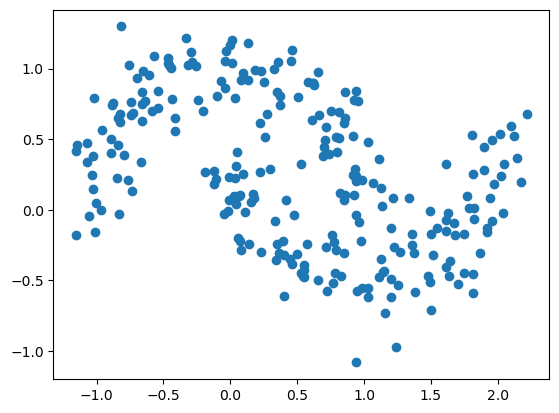

In [8]:
plt.scatter(X[:,0], X[:,1])

# scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.50701846e+00,  4.08379390e-01],
       [-2.99438152e-01,  1.41179262e+00],
       [ 4.78749347e-01,  5.25560368e-01],
       [-1.65071574e+00, -4.77543156e-01],
       [ 5.05001438e-01, -5.39667196e-01],
       [-1.85304164e+00,  4.08630006e-01],
       [ 2.21507293e-01,  2.58567610e-01],
       [-3.56023391e-01, -3.08400378e-01],
       [-2.28113282e-01,  7.37266673e-02],
       [ 1.65008235e+00,  4.69389057e-01],
       [-1.08914547e+00,  1.58945124e+00],
       [-4.33904691e-01, -4.98367664e-01],
       [-8.93337700e-01,  1.65941477e+00],
       [-6.94380151e-01, -1.29330805e-01],
       [-8.85495220e-01,  1.53270298e+00],
       [-3.10920285e-01,  3.94167190e-02],
       [ 5.47132710e-01, -8.99150238e-01],
       [-1.02732285e+00,  5.99791554e-01],
       [-1.27821639e+00,  9.97573989e-01],
       [-5.64050442e-01,  1.76446558e+00],
       [ 1.33517642e+00, -8.19326588e-01],
       [ 4.12339826e-01,  1.12512571e+00],
       [-1.39739637e+00,  9.83411701e-01],
       [-1.

# Model

In [11]:
dbscan = DBSCAN(eps=0.3)

dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [12]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0

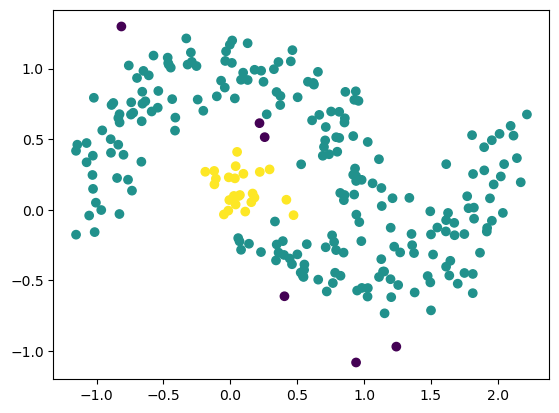

In [13]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

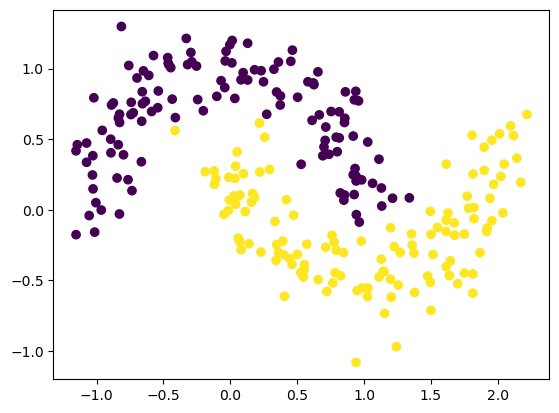

In [14]:
plt.scatter(X[:,0], X[:,1], c=y)

# Scoring

In [29]:
from sklearn.metrics import silhouette_score

silhouette_coeffients = []

eps_values = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    silhouette_coeffients.append(score)

In [30]:
silhouette_coeffients

[-0.28063417639880617,
 -0.2831177412727389,
 0.19219003173819926,
 0.23452399585934433,
 -0.09431694925726211,
 0.32461142145988015,
 0.32461142145988015,
 0.32461142145988015,
 0.2689541721405634,
 0.2689541721405634,
 0.2689541721405634]

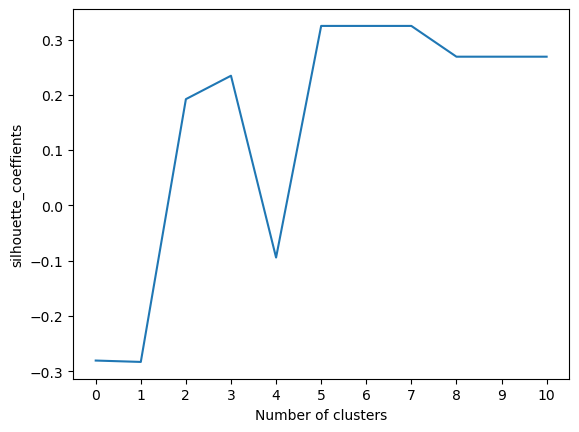

In [38]:
plt.plot(range(0,len(silhouette_coeffients)), silhouette_coeffients)
plt.xticks(range(0,11))
plt.xlabel('Number of clusters')
plt.ylabel("silhouette_coeffients")
plt.show()